### Pretrained

In [6]:
!ls data/ebmsumcorpus-code-ddcc708b53b82cb4588192995fa274c671982bc6/Abstracts/10022110.xml

data/ebmsumcorpus-code-ddcc708b53b82cb4588192995fa274c671982bc6/Abstracts/10022110.xml


In [ ]:
!cat data/ebmsumcorpus-code-ddcc708b53b82cb4588192995fa274c671982bc6/Abstracts/

In [3]:
%config Completer.use_jedi = False

In [4]:
import pandas as pd
from tqdm.notebook import tqdm
import re
from typing import List
import os
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
import numpy as np
import gensim.downloader as api


In [5]:
def load_docs(source_dir: str) -> List[List[str]]:
    docs = []
    for doc_name in os.listdir(source_dir):
        if os.path.isdir(doc_name):
            continue
        with open(f'{source_dir}/{doc_name}') as fh:
            doc = fh.readlines()
            docs.append(doc)
    return docs

In [6]:
docs = load_docs('clean_txt')

In [79]:
docs_tokenized = [sent.split() for doc in docs for sent in doc]

In [80]:
print(api.load('glove-wiki-gigaword-200', return_path=True))

/home/uadmin/gensim-data/glove-wiki-gigaword-200/glove-wiki-gigaword-200.gz


In [81]:
# # https://radimrehurek.com/gensim/models/word2vec.html#:~:text=common_texts%5D%2C%20min_count%3D1)-,Pretrained%20models,-Gensim%20comes%20with

# pretrained_vectors = api.load('glove-wiki-gigaword-300')

In [101]:
%%time

import gensim

model = '/home/uadmin/gensim-data/glove-wiki-gigaword-200/glove-wiki-gigaword-200.gz'

pretrained_vectors = gensim.models.KeyedVectors.load_word2vec_format(model, binary=False)

CPU times: user 34.1 s, sys: 280 ms, total: 34.4 s
Wall time: 34.4 s


In [102]:
from sklearn.metrics.pairwise import cosine_similarity

def show_similarity_for_single_word(vectors, word):
    matrix = cosine_similarity(vectors[word].reshape(1, -1), vectors.vectors)
    plt.hist(matrix.squeeze(0), bins='rice', edgecolor='k')
    plt.title(f'Распределение схожести для слова {word}')
#     plt.savefig('distr_varicose_pretrained.png', dpi=300)

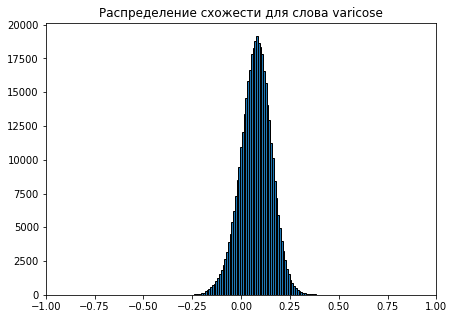

In [103]:
## ДЛЯ ПРЕЗЕНТАЦИИ
from sklearn.metrics.pairwise import cosine_similarity

word = 'varicose'
matrix = cosine_similarity(pretrained_vectors[word].reshape(1, -1), pretrained_vectors.vectors)

plt.figure(figsize=(7, 5))
plt.hist(matrix.squeeze(0), bins='rice', edgecolor='k')
plt.title(f'Распределение схожести для слова {word}')
plt.xlim([-1, 1])
plt.savefig(f'images/pretrained_{word}.png', dpi=300)

In [104]:
for token, val in pretrained_vectors.most_similar(word):
    print(f'{token:<20} {val:.3f}')

veins                0.712
hemorrhoids          0.562
vein                 0.533
sclerotherapy        0.513
thrombosis           0.476
phlebitis            0.473
clots                0.465
thrombophlebitis     0.462
fibroids             0.458
aneurysms            0.456


In [109]:
for v in pretrained_vectors.most_similar(word):
    print(v[0])
    
for v in pretrained_vectors.most_similar(word):
    print(round(v[1], 3))

veins
hemorrhoids
vein
sclerotherapy
thrombosis
phlebitis
clots
thrombophlebitis
fibroids
aneurysms
0.712
0.562
0.533
0.513
0.476
0.473
0.465
0.462
0.458
0.456
